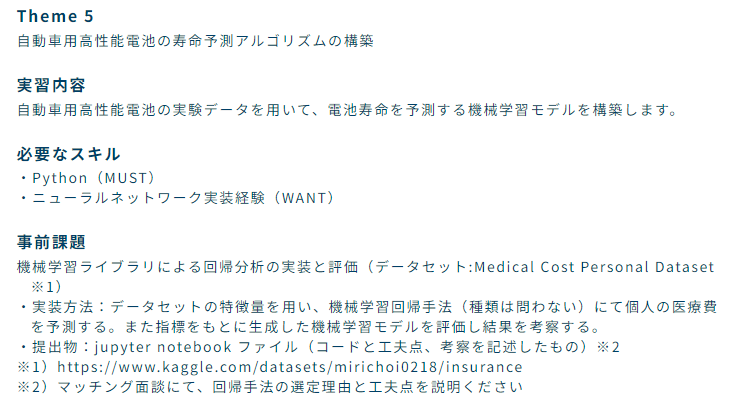

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read csv file as name of insurance

In [2]:
insurance = pd.read_csv('./insurance.csv')

Take a look of initial rows

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


This data consists of 1338 instances and 7 features

In [4]:
insurance.shape

(1338, 7)

Check data type and NaN values

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Check ranges by statistical data

In [6]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Check unique values of the categorical data

In [7]:
insurance['sex'].unique(), insurance['smoker'].unique(), insurance['region'].unique()  

(array(['female', 'male'], dtype=object),
 array(['yes', 'no'], dtype=object),
 array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object))

Check distribution of the numerical data

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

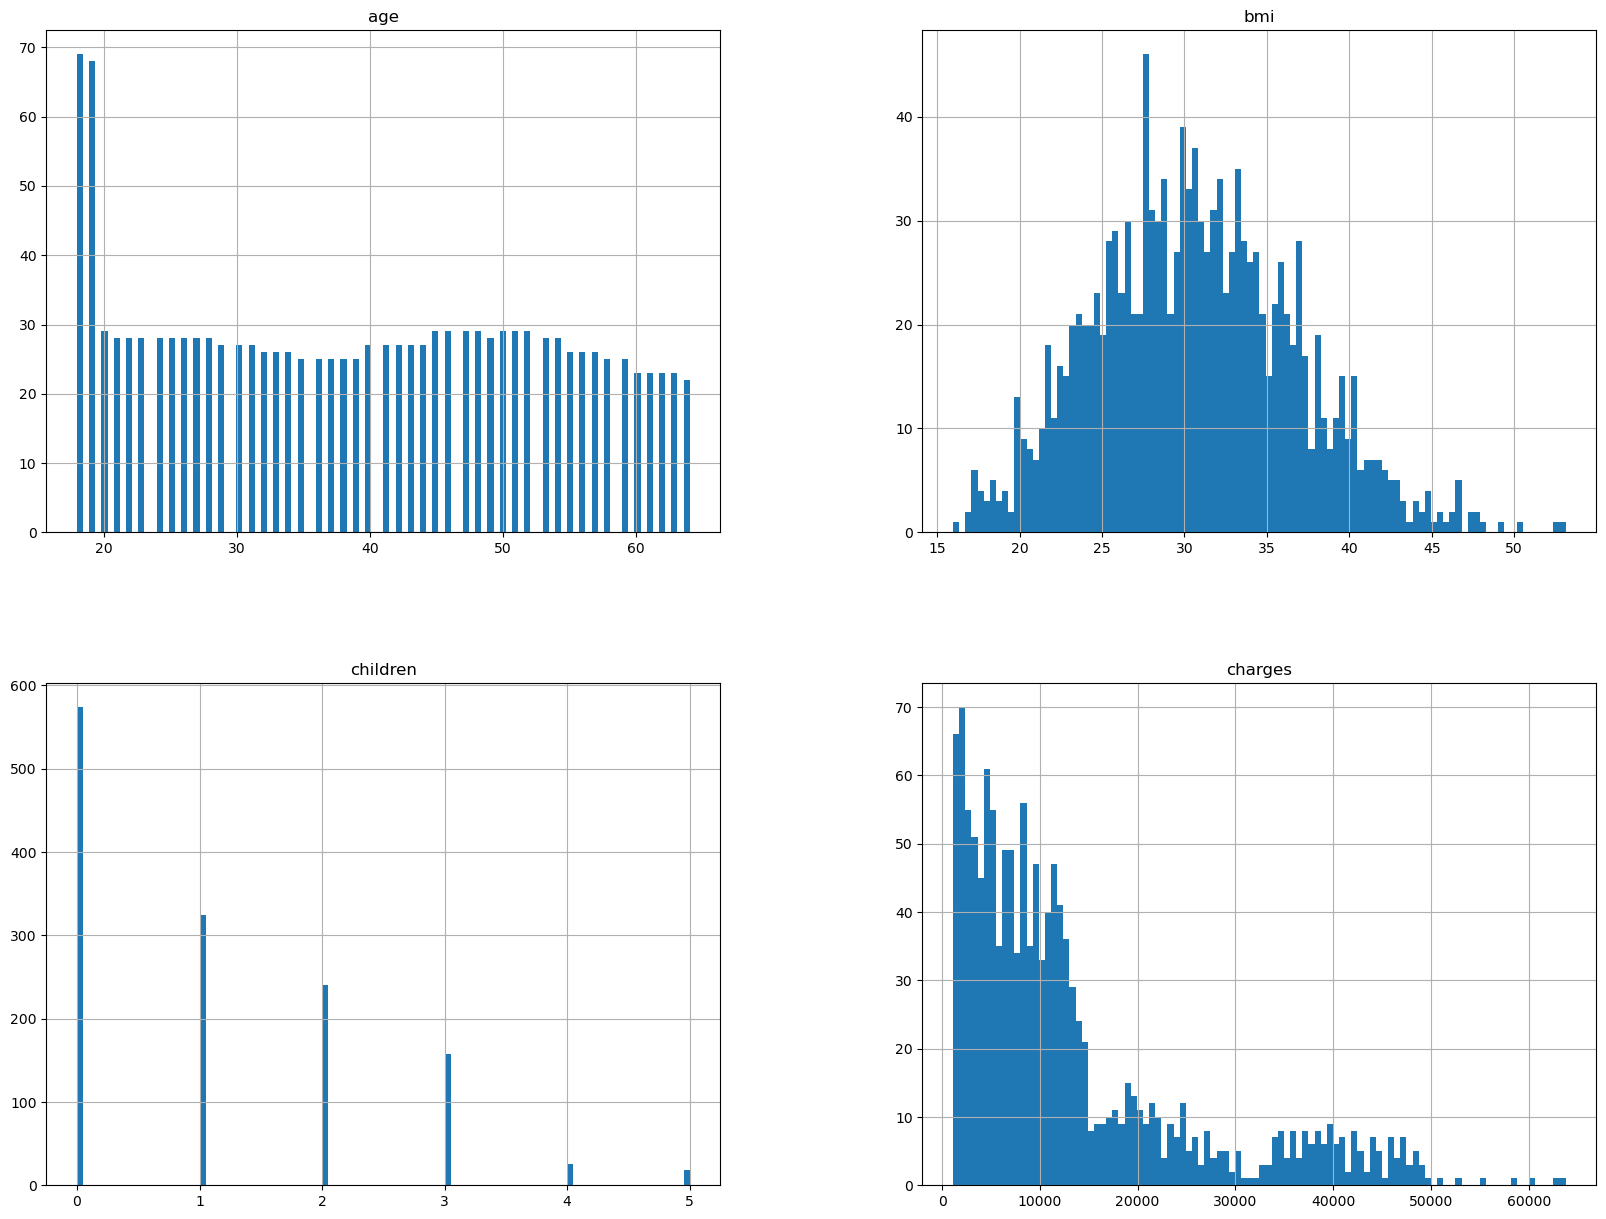

In [8]:
insurance.hist(bins=100, figsize=(20,15))

Ignore warnings

In [9]:
import warnings
warnings.filterwarnings('ignore')

Scatter map of 'age' and 'charges'. Along with the increasing of age, the minimum of the charges also increases.

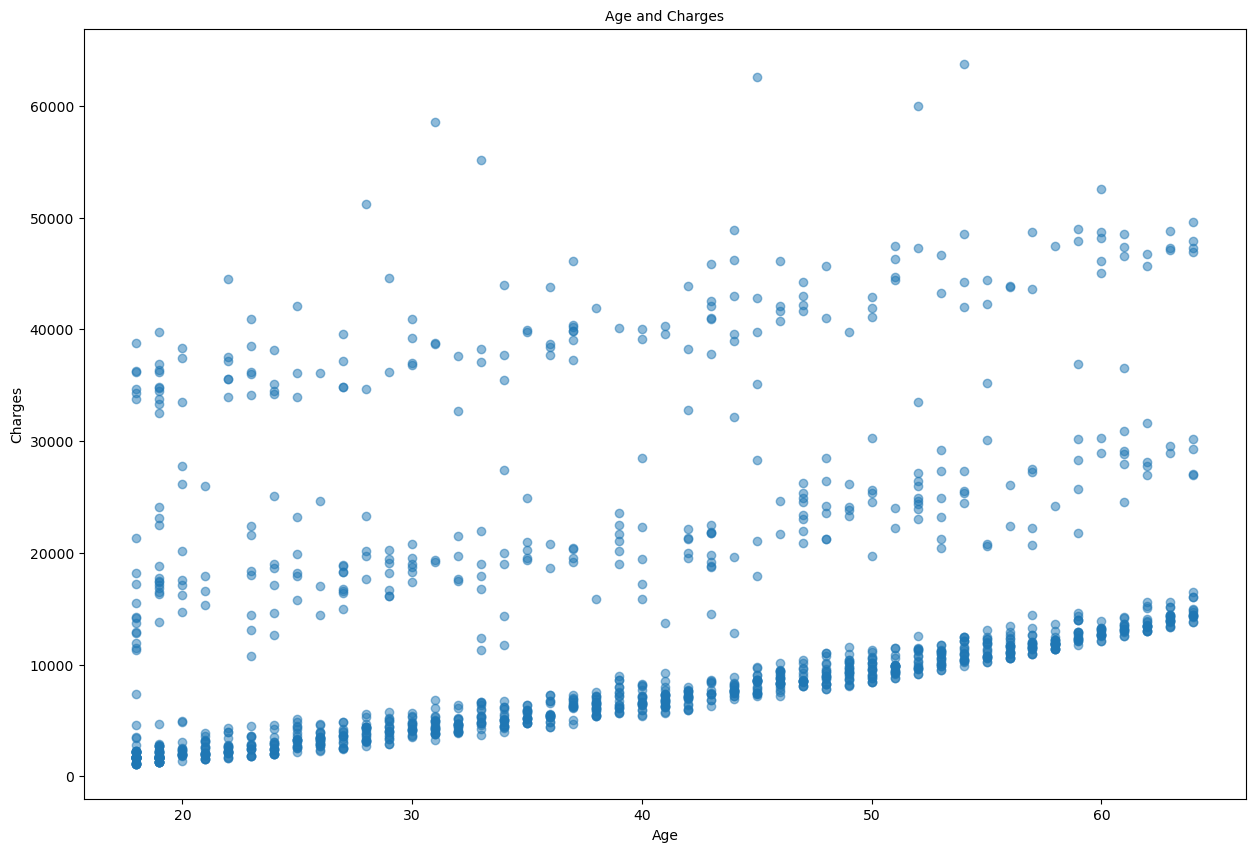

In [10]:
fig = plt.figure(figsize=(15,10))
plt.scatter(insurance['age'] , insurance['charges'], alpha=0.5 )
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age and Charges',size=10);

Histgram of 'sex' and 'charges'. We can only learn that the number of males is bigger than the number of females.

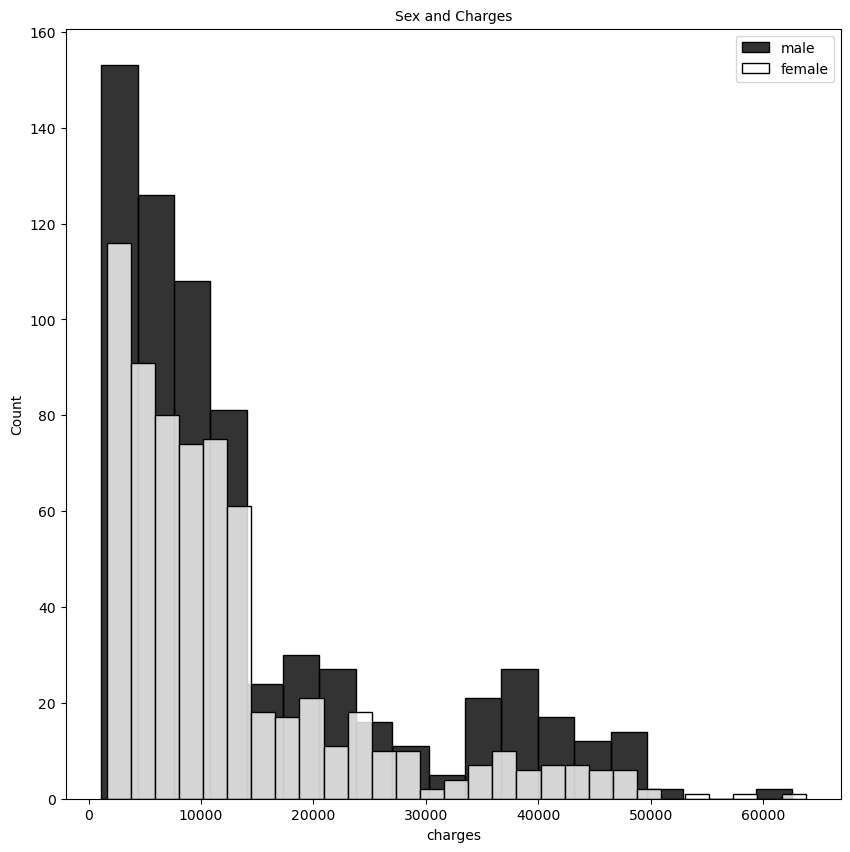

In [11]:
import seaborn as sns
fig = plt.figure(figsize=(10,10))
sns.histplot(data=insurance[insurance['sex']=='male'] ,  x='charges' , color='black', label='male' ,alpha=0.8)
sns.histplot(data=insurance[insurance['sex']=='female'] ,  x='charges', color='white', label='female' ,alpha=0.8)
plt.title('Sex and Charges',size=10)
plt.legend()

BMI range:

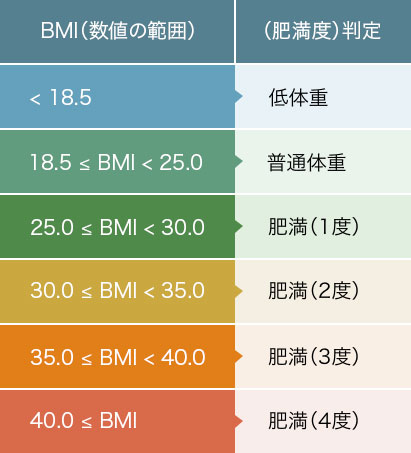

According to the table above, the BMI data was splited to 6 ranges. Data more than 'Obesity (2)' (BMI>=30)has bigger charges than the data lower than 'Obesity (1)'(BMI<30).

Text(0.5, 1.0, 'BMI and Charges')

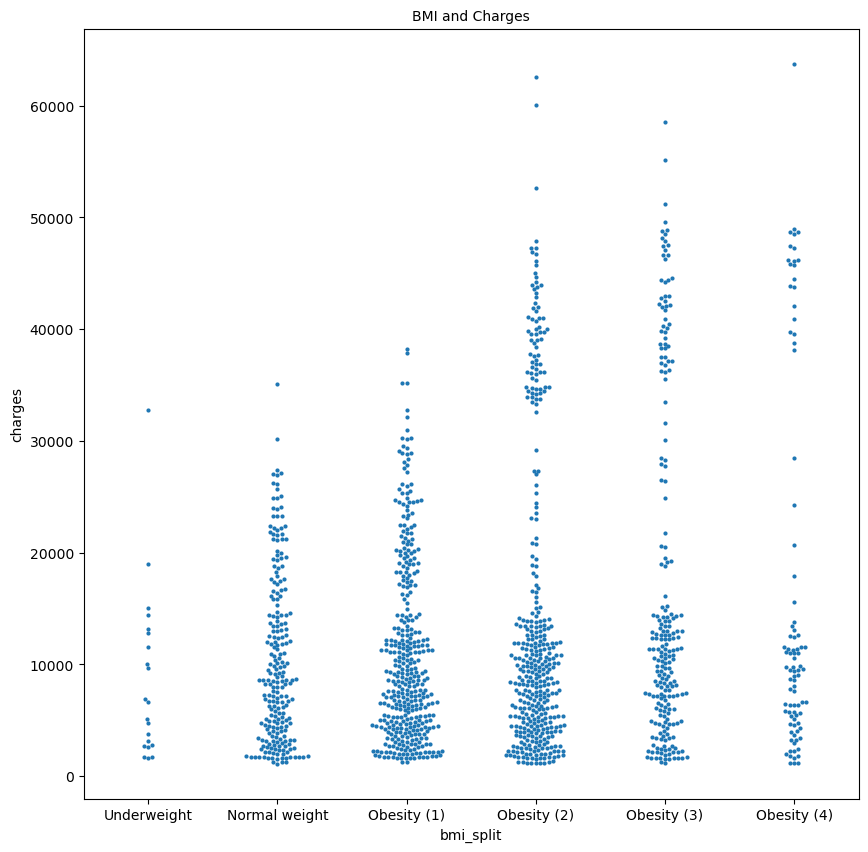

In [12]:
fig = plt.figure(figsize=(10,10))
insurance['bmi_split'] = pd.cut(insurance['bmi'], bins=[0,18.5,25,30,35,40,55], labels=['Underweight','Normal weight','Obesity (1)','Obesity (2)','Obesity (3)','Obesity (4)'])
sns.swarmplot(y=insurance['charges'], x=insurance['bmi_split'], data=insurance['bmi_split'], size=3)
plt.title('BMI and Charges',size=10)

Swarm map of 'children' and 'charges'. 

Text(0.5, 1.0, 'Children and Charges')

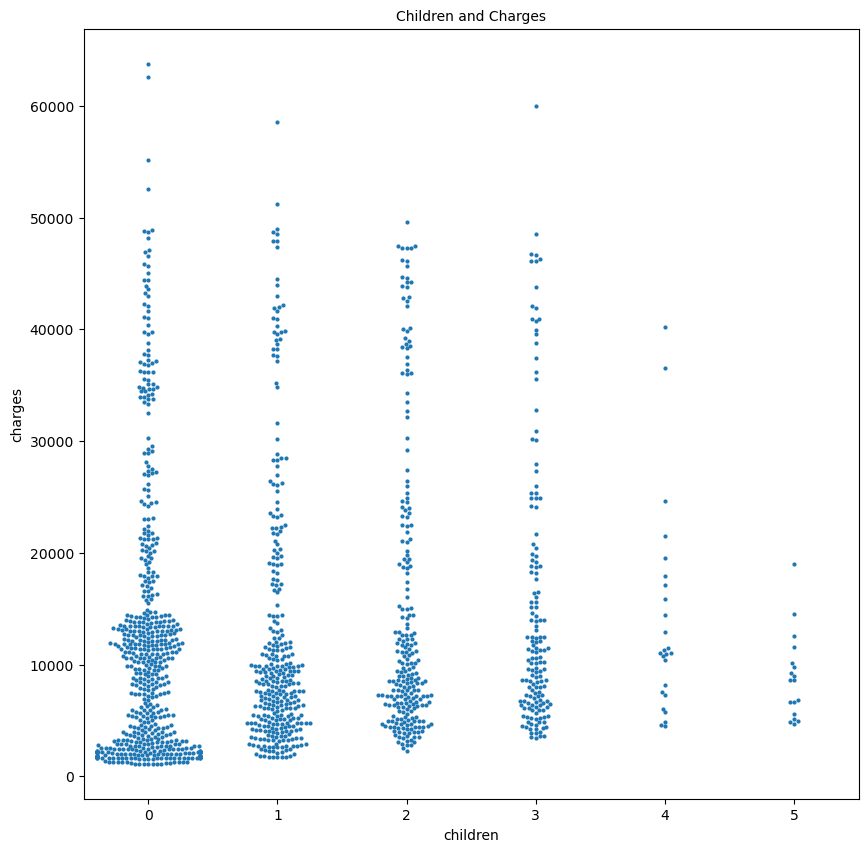

In [13]:
fig = plt.figure(figsize=(10,10))
sns.swarmplot(y=insurance['charges'], x=insurance['children'], data=insurance['children'], size=3)
plt.title('Children and Charges',size=10)

Smokers cost more than non-smokers.

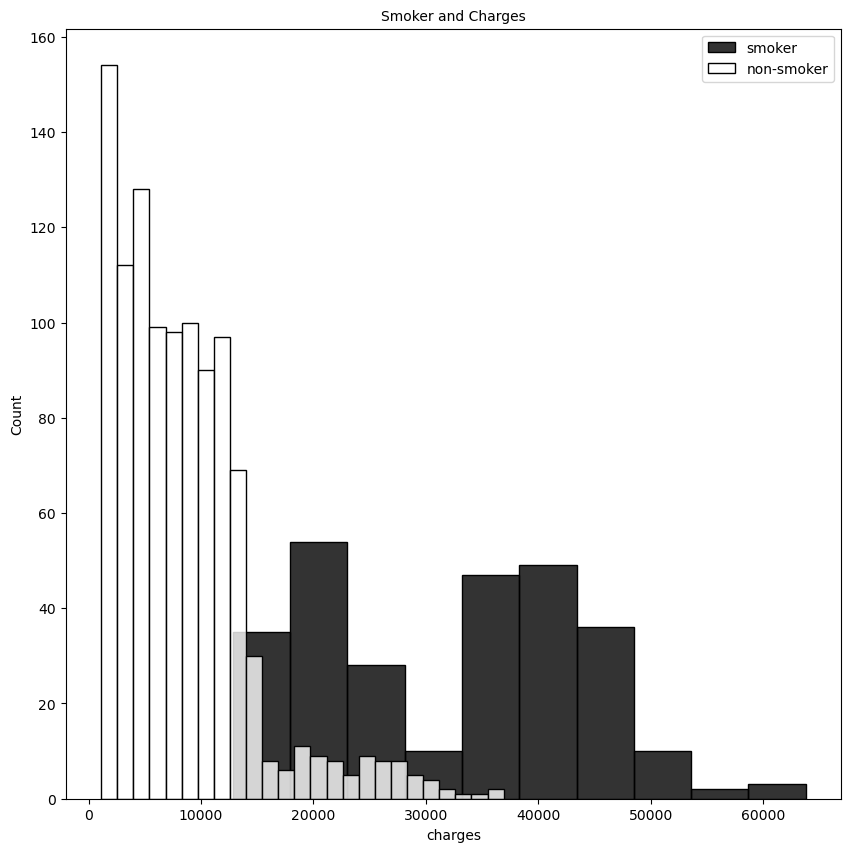

In [14]:
fig = plt.figure(figsize=(10,10))
sns.histplot(data=insurance[insurance['smoker']=='yes'],  x='charges' ,color='black'  ,label='smoker' ,alpha=0.8)
sns.histplot(data=insurance[insurance['smoker']=='no'],  x='charges',color='white' ,label='non-smoker' ,alpha=0.8)
plt.title('Smoker and Charges',size=10)
plt.legend()

Personally I think no big differences among different regions.

Text(0.5, 1.0, 'Region and Charges')

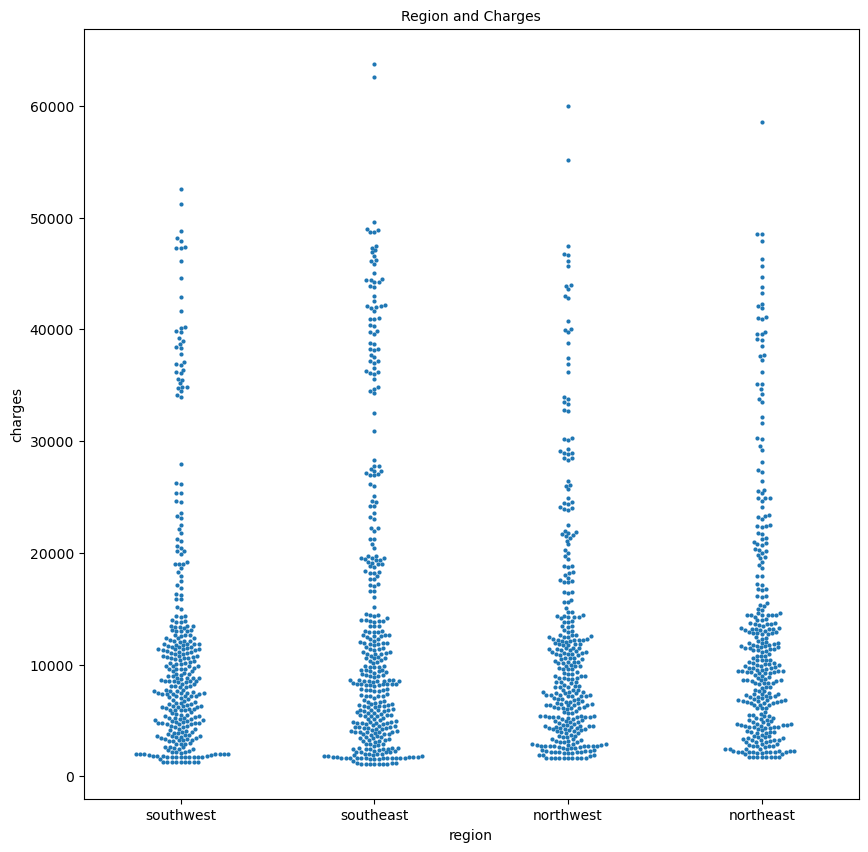

In [15]:
fig = plt.figure(figsize=(10,10))
sns.swarmplot(y=insurance['charges'], x=insurance['region'], data=insurance['region'], size=3)
plt.title('Region and Charges',size=10)

The shape of dataframe before any possible duplicates are deleted.

In [16]:
insurance.shape

(1338, 8)

In [17]:
insurance.drop_duplicates(inplace=True)
insurance.shape

(1337, 8)

One duplicate was deleted

The column of 'bmi_split' is no longer needed any more for the rest of processing

In [18]:
insurance.drop(['bmi_split'], axis=1, inplace=True)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Convert the 'object' data to the 'numerical' data with a deep copy of original 'insurance', because numerical type is needed for correlation analysis.

In [19]:
insurance_all_numerical = insurance.copy(deep=True)

insurance_all_numerical.replace('male',1, inplace=True)
insurance_all_numerical.replace('female',0, inplace=True)
insurance_all_numerical.replace('yes',1, inplace=True)
insurance_all_numerical.replace('no',0, inplace=True)
insurance_all_numerical.replace('southwest',1, inplace=True)
insurance_all_numerical.replace('southeast',2, inplace=True)
insurance_all_numerical.replace('northwest',3, inplace=True)
insurance_all_numerical.replace('northeast',4, inplace=True)

Correlation analysis between each two features. It's hard to say there is correlation between each two features due to the max value is 0.11, which is the value of 'age' and 'bmi', so I think it is unnecessary to decrease the number of the features. Moreover, the figure shows the 'charges' is mainly correlated with 'age' and 'smoker', less correlated with 'bmi' and 'children', barely correlated with 'sex' and 'region'. 

<Axes: >

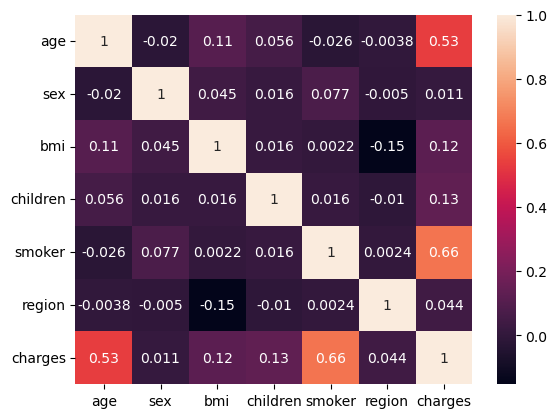

In [20]:
data_corr = insurance_all_numerical.corr(method='spearman')
sns.heatmap(data_corr, annot=True,
            xticklabels=data_corr.columns.values,
            yticklabels=data_corr.columns.values)

Convert 'object' data into dummy variables, and split the data with X(features: 'age', 'bmi', etc) and y(targets: 'charges').

In [21]:
X = pd.get_dummies(insurance.drop(['charges'], axis=1) , drop_first=True, dtype=int)
y = insurance.charges
X.head(), y.head()

(   age     bmi  children  sex_male  smoker_yes  region_northwest  \
 0   19  27.900         0         0           1                 0   
 1   18  33.770         1         1           0                 0   
 2   28  33.000         3         1           0                 0   
 3   33  22.705         0         1           0                 1   
 4   32  28.880         0         1           0                 1   
 
    region_southeast  region_southwest  
 0                 0                 1  
 1                 1                 0  
 2                 1                 0  
 3                 0                 0  
 4                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

Split dataset into train-set(80%) and test-set(20%), and normalize X(both train-set and test-set) with MinMaxScalar

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2 , random_state=0)
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train_scaled = Scaler.transform(X_train)  
X_test_scaled = Scaler.transform(X_test)
X_scaled = Scaler.transform(X)

Take LinearRegression for an instance for a simple testing

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

0.7530385567240125

Cross validation testing

In [24]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
cross_val_score(lr, X_scaled, y, cv=cv)

array([0.74978144, 0.8104191 , 0.71411996, 0.75857274, 0.73649591,
       0.76137734, 0.69473498, 0.74303582, 0.77775613, 0.7776007 ])

Model Selection：
1. linearRegressor
2. RidgeRegressor
3. LassoRegressor
4. DecisionTreeRegressor
5. RandomForestRegressor
6. GradientBoostingRegressor
7. MLPRegressor

Load the above models and grid search to find the best model with its best parameters by the best score each model can get.

In [25]:
#Load GridSearchCV
from sklearn.model_selection import GridSearchCV
#Load models
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
#Integrate algotithms with different models and their parameters
def findTheBestModelWithGridSearchCV(X, y):
    algorithms = {
        
        'linear':{
            'model':LinearRegression(),
            'parameters':{
            
            }
        },
        
        'ridge':{
            'model':Ridge(),
            'parameters':{
                'alpha' : [0.1, 0.5, 1],
                'solver': ['svd']
            }
        },
        
        'lasso':{
            'model':Lasso(),
            'parameters':{
                'alpha': [0.1, 0.5, 1],
                'selection':['random','cyclic']
            }
        },
        
        'decision_tree_regressor':{
            'model':DecisionTreeRegressor(),
            'parameters':{
                'criterion':['squared_error', 'friedman_mse'],
                'splitter':['best', 'random']
                
            }
        },
        
        'random_forest_regressor':{
            'model':RandomForestRegressor(),
            'parameters':{
                'max_depth': [None],
                'max_features': [1, 3, 5],
                'min_samples_split': [1, 2, 3],
                'min_samples_leaf': [1, 3, 5],
                'max_leaf_nodes': [10, 20, 30],
                'bootstrap': [False],
                'n_estimators' :[50, 100, 150]
            }
        },
        
        'gradient_boosting_regressor':{
            'model' :GradientBoostingRegressor(),
            'parameters':{
                'n_estimators' : [100, 200, 300],
                'learning_rate': [0.05, 0.1, 0.15],
                'max_depth': [2, 3, 4],
                'min_samples_leaf': [1, 10, 100],
                'max_features': [0.5, 0.7, 0.9]
            }
        },
        
        'mlp_regressor':{
            'model' : MLPRegressor(),
            'parameters':{
                'hidden_layer_sizes':[20,50,80],
                'activation': ['identity', 'logistic', 'tanh', 'relu'],
                'solver': ['lbfgs','adam'],
                'batch_size':[100, 200]
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
    for algorithm, config in algorithms.items():
        grid_search = GridSearchCV(config['model'], config['parameters'], cv=cv, return_train_score=False)
        grid_search.fit(X,y)
        scores.append({
            'model': algorithm,
            'best_score': grid_search.best_score_,
            'best_parameters': grid_search.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_parameters'])

In [26]:
#options of displaying outputs
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth',150)

In [27]:
#output each model with its best score and best parameters
findTheBestModelWithGridSearchCV(X_scaled, y)

,model,best_score,best_parameters
0,linear,0.752389,{}
1,ridge,0.752418,"{'alpha': 0.5, 'solver': 'svd'}"
2,lasso,0.752423,"{'alpha': 1, 'selection': 'cyclic'}"
3,decision_tree_regressor,0.705008,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
4,random_forest_regressor,0.864448,"{'bootstrap': False, 'max_depth': None, 'max_features': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 1, 'n_estimators': 100}"
5,gradient_boosting_regressor,0.867473,"{'learning_rate': 0.05, 'max_depth': 3, 'max_features': 0.9, 'min_samples_leaf': 10, 'n_estimators': 100}"
6,mlp_regressor,0.845042,"{'activation': 'relu', 'batch_size': 100, 'hidden_layer_sizes': 20, 'solver': 'lbfgs'}"


According to 'best_score', I choose NO.4, NO.5, NO.6 models as our candidates. But before we evaluate the candidates, we can take a look at the learning curves of all the models.

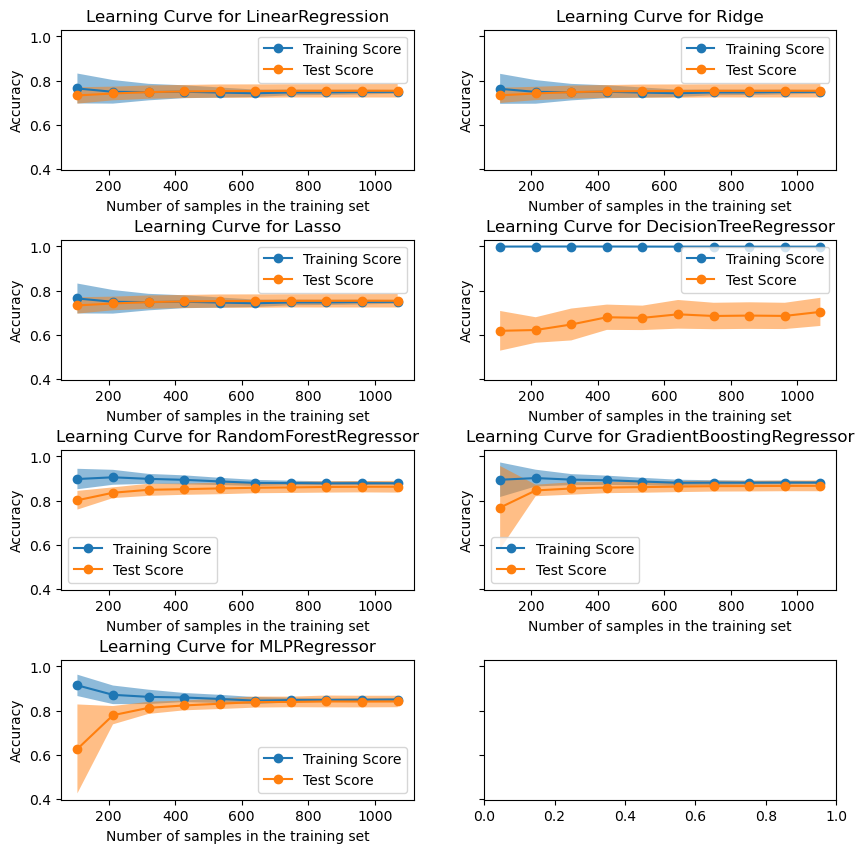

In [28]:
#Create all the models with their best parameters.
linear_model = LinearRegression()
ridge_model = Ridge(alpha=0.5, solver='svd')
lasso_model = Lasso(alpha=1, selection='random')
decision_tree_model = DecisionTreeRegressor(criterion='squared_error', splitter='random')
random_forest_model = RandomForestRegressor(bootstrap=False, max_depth=None, max_features=5, max_leaf_nodes=20, 
                                            min_samples_leaf=5, min_samples_split=1, n_estimators=50)
gradient_boosting_model = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, max_features=0.9, min_samples_leaf=10, n_estimators=100)
mlp_model = MLPRegressor(activation='relu', batch_size=100, hidden_layer_sizes=20, solver='lbfgs')
#Load LearningCurveDisplay function
from sklearn.model_selection import LearningCurveDisplay
#draw graphs of learning curves.
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10, 10), sharey=True,gridspec_kw=dict(hspace=0.5))
ax = ax.ravel()
common_params = {
    "X": X_scaled,
    "y": y,
    "train_sizes": np.linspace(0.1, 1, 10),
    "cv": ShuffleSplit(n_splits=20, test_size=0.2, random_state=1),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([linear_model, ridge_model,lasso_model,decision_tree_model,
                                    random_forest_model,gradient_boosting_model,mlp_model]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

The final scores of LinearRegression, LassoRegression, RidgeRegression are lower than the final scores of RandomForestRegression, GradientBoostingRegression, MLPRegression. The learning curve of DecisionTreeRegression has a high variance.

Evaluation of NO.4(RandomForestRegressor)：

In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
rfr = RandomForestRegressor(bootstrap=False, max_depth=None, max_features=5, 
                            max_leaf_nodes=20, min_samples_leaf=5 , min_samples_split=3, n_estimators=150)
rfr.fit(X_train_scaled, y_train)
rfr_prediction = rfr.predict(X_test_scaled)
rfr_scores = [rfr.score(X_test_scaled, y_test),
              r2_score(y_test, rfr_prediction), 
              mean_squared_error(y_test, rfr_prediction), 
              mean_absolute_error(y_test, rfr_prediction)]
rfr_scores

[0.8398525499983525, 0.8398525499983525, 26941536.16529733, 3002.127160690307]

Evaluation of NO.5(GradientBoostingRegressor)：

In [30]:
gbr = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, max_features=0.9, min_samples_leaf=10, n_estimators=100)
gbr.fit(X_train_scaled, y_train)
gbr_prediction = gbr.predict(X_test_scaled)
gbr_scores=[gbr.score(X_test_scaled, y_test),
            r2_score(y_test, gbr_prediction), 
            mean_squared_error(y_test, gbr_prediction), 
            mean_absolute_error(y_test, gbr_prediction)]
gbr_scores

[0.8528082479864625, 0.8528082479864625, 24762004.70294968, 2754.749749501184]

Evaluation of NO.6(MLPRegressor)

In [31]:
mlp = MLPRegressor(activation='relu', batch_size=100, hidden_layer_sizes=20, solver='lbfgs')
mlp.fit(X_train_scaled, y_train)
mlp_prediction = mlp.predict(X_test_scaled)
mlp_scores = [mlp.score(X_test_scaled, y_test),
              r2_score(y_test, mlp_prediction), 
              mean_squared_error(y_test, mlp_prediction), 
              mean_absolute_error(y_test, mlp_prediction)]
mlp_scores

[0.8309923285561217,
 0.8309923285561217,
 28432087.381791543,
 3197.9937310551436]

The score matrix consists of the above 3 lists of scores for drawing and comparing.

In [32]:
from sklearn.preprocessing import MaxAbsScaler
candidates_scores = np.vstack((rfr_scores, gbr_scores, mlp_scores))
Scaler2 = MaxAbsScaler()
Scaler2.fit(candidates_scores)
candidates_scores_scaled = Scaler2.transform(candidates_scores) 
candidates_scores_scaled

array([[0.98480819, 0.98480819, 0.94757503, 0.9387533 ],
       [1.        , 1.        , 0.87091758, 0.86139936],
       [0.97441873, 0.97441873, 1.        , 1.        ]])

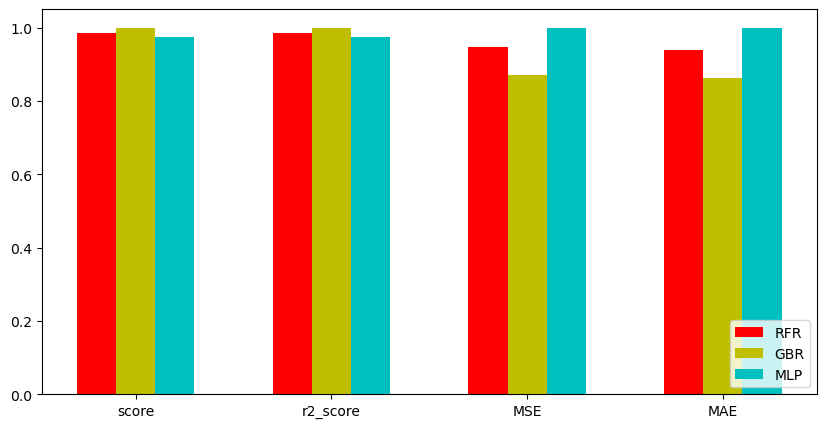

In [33]:
fig = plt.figure(figsize=(10,5))

bar_width=0.2                                                  
labels=['score','r2_score','MSE','MAE']   
x=np.arange(len(labels))     
                      
plt.bar(x,            candidates_scores_scaled[0,:].flatten(),bar_width,color='r',align='center',label='RFR')  
plt.bar(x+bar_width,  candidates_scores_scaled[1,:].flatten(),bar_width,color='y',align='center',label='GBR')
plt.bar(x+bar_width*2,candidates_scores_scaled[2,:].flatten(),bar_width,color='c',align='center',label='MLP')

plt.xticks(x+bar_width,labels)

plt.legend(loc='lower right') 

Due to the scores of GBR are higher than others', and the losses of GBR are lower than others', GBR is our winner.

Train a GBR model with non-scaled train dataset. 

In [34]:
gbr2 = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, max_features=0.9, min_samples_leaf=10, n_estimators=100)
gbr2.fit(X_train, y_train)
gbr2.score(X_test, y_test)

0.8520094246085614

Take myself as an examlple for prediction

In [35]:
personal_information = [[28, 20.11, 0, 1, 1, 0, 1 ,0]]# default personal information can be changed here
gbr2.predict(personal_information)

array([17051.97231648])

Based on my personal features, I should pay about ＄17051 for my healthy condition.

In [36]:
if_I_dont_smoke = [[28, 20.11, 0, 1, 0, 0, 1 ,0]]
gbr2.predict(if_I_dont_smoke)

array([4365.93877858])

If I don't smoke any more, the cost will be about ＄4365

Drawing a gragh to show how does every feature affect the charges

In [37]:
def drawPredictionGragh(feature_name='age', feature_range=np.arange(0,55), p_info=[[28, 20.11, 0, 1, 1, 0, 1 ,0]]):
    fig = plt.figure(figsize=(5,5))
    p_info = np.array(p_info)
    results = []
    match feature_name:
        case 'age': 
             for i in feature_range:
                p_info[0][0] = i
                results.append(gbr2.predict(p_info))
        case 'bmi':
             for i in feature_range:
                p_info[0][1] = i
                results.append(gbr2.predict(p_info))
        case 'children':
            feature_range = np.arange(0,6)
            for i in feature_range:
                p_info[0][2] = i
                results.append(gbr2.predict(p_info))
        case 'sex':
            feature_range = np.arange(0,2)
            for i in feature_range:
                p_info[0][3] = i
                results.append(gbr2.predict(p_info))
        case 'smoker':
            feature_range = np.arange(0,2)
            for i in feature_range:
                p_info[0][4] = i
                results.append(gbr2.predict(p_info))
        case 'region':
            feature_range = np.arange(0,4)
            p_info[:, 5:8] = [[0,0,0]]#NorthEast
            results.append(gbr2.predict(p_info))
            p_info[:, 5:8] = [[0,0,1]]#SouthWest
            results.append(gbr2.predict(p_info))
            p_info[:, 5:8] = [[0,1,0]]#SouthEast
            results.append(gbr2.predict(p_info))
            p_info[:, 5:8] = [[1,0,0]]#NorthWest
            results.append(gbr2.predict(p_info))
            
    plt.plot(feature_range, results)
    plt.xlabel(f'{feature_name.title()}')
    plt.ylabel('Charges')
    plt.title(f'{feature_name.title()} and Charges(prediction)', size=10)
    print(f'Min:\t{np.min(results)},\nMax:\t{np.max(results)},\nMean:\t{np.mean(results)},\nStd:\t{np.std(results)}')

The following figures show how does every feature affect the charges

Min:	15459.788217404048,
Max:	25806.191559551564,
Mean:	20909.330639697346,
Std:	4285.279363441872


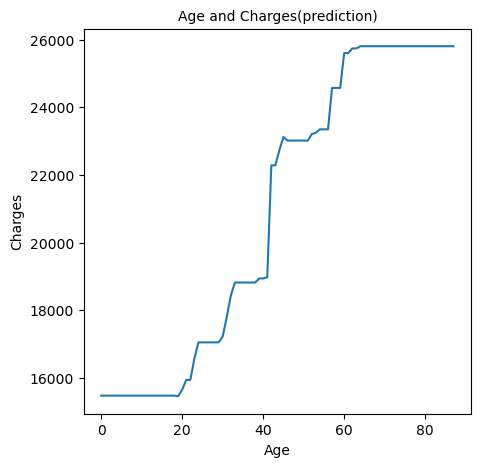

In [38]:
drawPredictionGragh('age', np.arange(0,88), personal_information)#age from 0 years old to 88 years old.

Min:	17051.97231647798,
Max:	39385.67770228309,
Mean:	26814.041357320726,
Std:	10158.0619524293


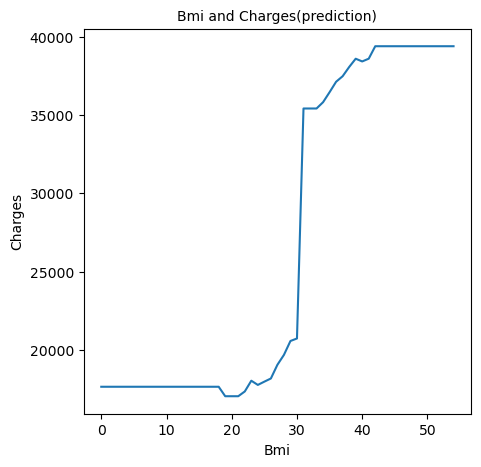

In [39]:
drawPredictionGragh('bmi', np.arange(0,55), personal_information)#BMI from 0 to 55.

Min:	17051.97231647798,
Max:	17119.9330854122,
Mean:	17097.27949576746,
Std:	32.03701371202736


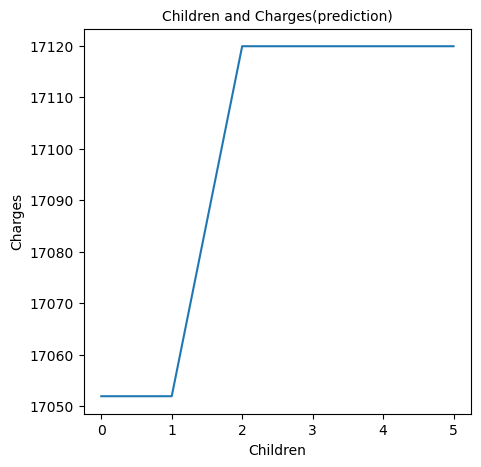

In [40]:
drawPredictionGragh('children', personal_information)#Children from 0 to 5.

Min:	17051.97231647798,
Max:	17175.13517462391,
Mean:	17113.553745550944,
Std:	61.581429072964966


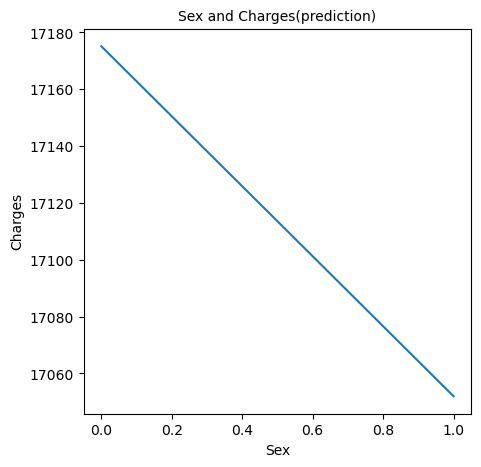

In [41]:
drawPredictionGragh('sex', personal_information)#Sex from 0(female) to 1(male).

Min:	4365.938778579963,
Max:	17051.97231647798,
Mean:	10708.95554752897,
Std:	6343.016768949008


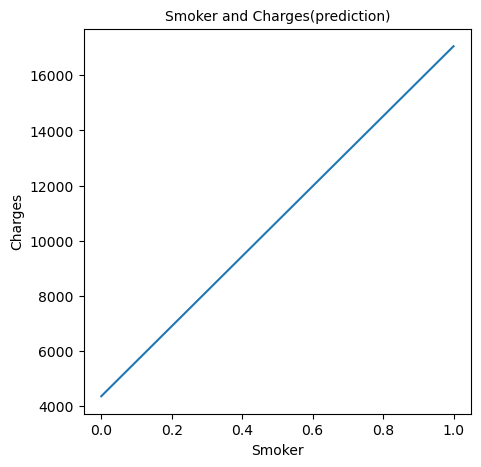

In [42]:
drawPredictionGragh('smoker', personal_information)#Smoker from 0(is not a smoker) to 1(is a smoker).

Min:	16642.847188682303,
Max:	17051.97231647798,
Mean:	16896.873667333624,
Std:	152.87118805376127


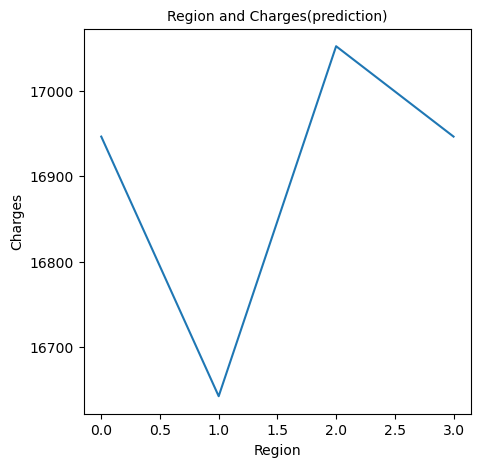

In [43]:
drawPredictionGragh('region', personal_information)#Regions[0(NorthWest), 1(SouthEast), 2(SouthWest), 3(NorthEast)].

Conclusion: In this pre-challenge, GradientBoostingRegression is the best model for predicting one's personal medical costs, because it has the highest accuracy among all of the models I selected, and the lowest loss than the other 2 candidates. Through predicting my potential medical costs by my features, I think the cost will be mainly affected by one's age, bmi, whether he or she smokes or not, and it has a less correlation with sex, region and the number of children. 